This Dataset captures various energy metrics, including usage, reactive power, CO2 emissions, and power factor values, over specific intervals to analyze patterns in power consumption and efficiency.

OBJECTIVE:
* TO identify factors affecting energy consumption and power quality through factor analysis, focusing on relationships among usage, reactive power, emissions and efficiency indicators

In [1]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

In [4]:
df=pd.read_csv(r"steel_industry.csv")

In [5]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Day_of_week'],
      dtype='object')

In [6]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week
0,1/1/2018 0:15,3.17,2.95,0.0,0.0,73.21,100.0,900,1
1,1/1/2018 0:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,1
2,1/1/2018 0:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,1
3,1/1/2018 1:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,1
4,1/1/2018 1:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,1


In [7]:
df.drop('date',axis=1,inplace=True)

In [11]:
df.isnull().sum()

Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
Day_of_week                             0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   Day_of_week                           35040 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 2.1 MB


<Axes: >

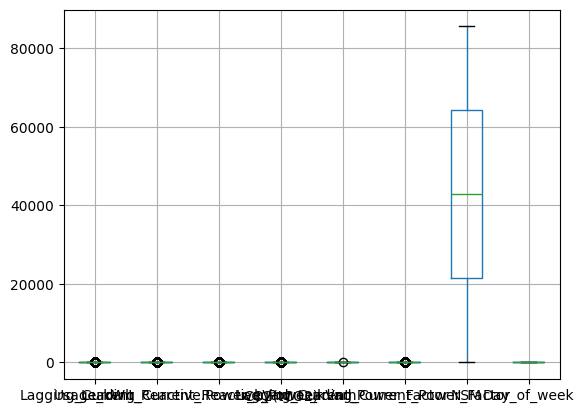

In [13]:
df.boxplot(column=['Usage_kWh','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM','Day_of_week'])

# Bartlett Test
* Ho: Correlation matrix is an identity matrix
* H1: Correlation matrix is not an identity matrix

In [14]:
Correlation = df.corr()
Correlation.style.applymap(lambda x: 'background-color : orange' if x >=0.7 else '')

C:\Users\User\AppData\Local\Temp\ipykernel_1628\4032369847.py:2: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  Correlation.style.applymap(lambda x: 'background-color : orange' if x >=0.7 else '')


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610,-0.240705
Lagging_Current_Reactive.Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662,-0.256227
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605,0.212922
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726,-0.235298
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270,0.042465
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563,-0.257677
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000,-0.000000
Day_of_week,-0.240705,-0.256227,0.212922,-0.235298,0.042465,-0.257677,-0.000000,1.000000


In [15]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(np.float64(339879.14576284995), np.float64(0.0))

* We reject Ho,
* Conclude: Correlation matrix is not an identity matrix

# KMO Test

In [16]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

np.float64(0.7301040697894404)

Overall KMO for our data is 0.73, which is good. Hence we can proceed with factor analysis

# Choosing the number of factors

In [18]:
fa = FactorAnalyzer(rotation='varimax',method="principal")
fa.fit(df)

eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([3.51047047, 2.58722088, 0.88852794, 0.57022128, 0.3028352 ,
       0.081915  , 0.04752381, 0.01128542])

In [19]:
dd=pd.DataFrame(eigen_values,columns=["Eigen_Values"])
dd['Factor']=[1,2,3,4,5,6,7,8]
dd.head()

,Eigen_Values,Factor
0,3.510470,1
1,2.587221,2
2,0.888528,3
3,0.570221,4
4,0.302835,5


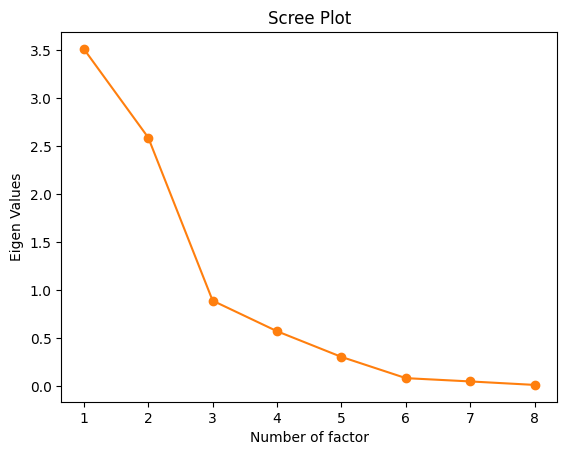

In [21]:
import matplotlib.pyplot as plt
plt.plot('Factor','Eigen_Values', data=dd, linestyle='-', marker='o')
plt.xlabel("Number of factor")
plt.ylabel("Eigen Values")
plt.title("Scree Plot")
plt.show()

Here, you can see only for 2-factors eigenvalues are greater than one. It means we need to choose only 2 factors

# Performing Factor Analysis

In [22]:
pf=FactorAnalyzer(n_factors=2,rotation="varimax",method="principal")

In [23]:
model=pf.fit(df)

# Correlation Matrix

In [24]:
data_loading=df.columns.to_list()
data_loading

['Usage_kWh',
 'Lagging_Current_Reactive.Power_kVarh',
 'Leading_Current_Reactive_Power_kVarh',
 'CO2(tCO2)',
 'Lagging_Current_Power_Factor',
 'Leading_Current_Power_Factor',
 'NSM',
 'Day_of_week']

In [25]:
Correlation=pd.DataFrame(model.corr_,index=data_loading,columns=data_loading)
Correlation.style.applymap(lambda x: 'background-color : yellow' if x >= 0.7 else '')

C:\Users\User\AppData\Local\Temp\ipykernel_1628\2013723047.py:2: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  Correlation.style.applymap(lambda x: 'background-color : yellow' if x >= 0.7 else '')


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610,-0.240705
Lagging_Current_Reactive.Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662,-0.256227
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605,0.212922
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726,-0.235298
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270,0.042465
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563,-0.257677
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000,-0.000000
Day_of_week,-0.240705,-0.256227,0.212922,-0.235298,0.042465,-0.257677,-0.000000,1.000000


# Factor Loading Matrix

In [26]:
factor=["Factor1 (Z1)","Factor2 (Z2)"]

In [27]:
loading=pd.DataFrame(model.loadings_,columns=factor,index=data_loading)
loading=loading.abs()
loading.style.applymap(lambda x: 'background-color : orange' if x > 0.5 else '')

C:\Users\User\AppData\Local\Temp\ipykernel_1628\388647276.py:3: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  loading.style.applymap(lambda x: 'background-color : orange' if x > 0.5 else '')


,Factor1 (Z1),Factor2 (Z2)
Usage_kWh,0.973122,0.141604
Lagging_Current_Reactive.Power_kVarh,0.923825,0.037226
Leading_Current_Reactive_Power_kVarh,0.470720,0.812713
CO2(tCO2),0.970958,0.134625
Lagging_Current_Power_Factor,0.272214,0.864887
Leading_Current_Power_Factor,0.493827,0.805343
NSM,0.201447,0.721672
Day_of_week,0.357708,0.170160


* Usage_kWh, Lagging_Current_Reactive.Power_kVarh, CO2(tCO2) have high correlation with Factor 1
* Leading_Current_Reactive_Power_kVarh, Lagging_Current_Power_Factor, Leading_Current_Power_Factor, NSM have high correlation with Factor 2

# Eigen Values

In [28]:
header=["Eigen_Values","Percentage of Variance","Cumulative Percentage of Variance Explained"]

In [29]:
variance_Explained=pd.DataFrame(model.get_factor_variance(),columns=factor,index=header)
variance_Explained

,Factor1 (Z1),Factor2 (Z2)
Eigen_Values,3.451257,2.646434
Percentage of Variance,0.431407,0.330804
Cumulative Percentage of Variance Explained,0.431407,0.762211


* 76.22% of variance is explained by 3 factor

# Communalities & Uniqueness

In [30]:
comm=pd.DataFrame(model.get_communalities(),columns=["Communalities"],index=data_loading)
comm['Uniqueness']=model.get_uniquenesses()
round(comm,2)

,Communalities,Uniqueness
Usage_kWh,0.97,0.03
Lagging_Current_Reactive.Power_kVarh,0.85,0.15
Leading_Current_Reactive_Power_kVarh,0.88,0.12
CO2(tCO2),0.96,0.04
Lagging_Current_Power_Factor,0.82,0.18
Leading_Current_Power_Factor,0.89,0.11
NSM,0.56,0.44
Day_of_week,0.16,0.84


# Final Transformation
* Data dimesiona; reduction from 8 variable to 3 factor

In [31]:
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week
0,3.17,2.95,0.0,0.0,73.21,100.0,900,1
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,1
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,1
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,1
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,1


In [33]:
output=pd.DataFrame(model.fit_transform(df),columns=['Data Factor 1','Data Factor 2'])
output

,Data Factor 1,Data Factor 2
0,-0.472152,-1.103879
1,-0.471746,-1.205212
2,-0.476207,-1.135325
3,-0.479906,-1.163757
4,-0.475261,-1.211722
...,...,...
35035,-0.242337,-0.381198
35036,-0.213045,-0.219348
35037,-0.188994,-0.101721
35038,-0.182884,-0.070409


In [34]:
print("Original Shape: ",df.shape)
print("Transformed Shape: ",output.shape)

Original Shape:  (35040, 8)
Transformed Shape:  (35040, 2)


# To check the factor component is uncorrelated/independent

In [35]:
round(output.corr(),5)

,Data Factor 1,Data Factor 2
Data Factor 1,1.0,0.0
Data Factor 2,0.0,1.0


* Correlation between data Factor 1 and Factor 2 is 0%, which indicates they are independent

* Factor 1 = Energy Use and emissions
* Factor 2 = Power efficiency and time pattern